In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('/content/AirQualityUCI.xlsx')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  

In [7]:
# Convert 'Date' and 'Time' columns to strings, then combine them into a single 'Datetime' column
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [8]:
# Fill missing values with the median of each column (numeric columns only)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Display the first few rows after preprocessing
print("\nFirst few rows after preprocessing:")
print(df.head())


First few rows after preprocessing:
                     CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  PT08.S2(NMHC)  \
Datetime                                                                       
2004-03-10 18:00:00     2.6      1360.00       150  11.881723        1045.50   
2004-03-10 19:00:00     2.0      1292.25       112   9.397165         954.75   
2004-03-10 20:00:00     2.2      1402.00        88   8.997817         939.25   
2004-03-10 21:00:00     2.2      1375.50        80   9.228796         948.25   
2004-03-10 22:00:00     1.6      1272.25        51   6.518224         835.50   

                     NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
Datetime                                                            
2004-03-10 18:00:00    166.0       1056.25    113.0       1692.00   
2004-03-10 19:00:00    103.0       1173.75     92.0       1558.75   
2004-03-10 20:00:00    131.0       1140.00    114.0       1554.50   
2004-03-10 21:00:00    172.0       1092.00    122.0      

In [9]:
# Display basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.869652  -159.090093     1.865576     894.475963   
std      77.657170   329.817015   139.789093    41.380154     342.315902   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.004958     711.000000   
50%       1.500000  1052.500000  -200.000000     7.886653     894.500000   
75%       2.600000  1221.250000  -200.000000    13.636091    1104.750000   
max      11.900000  2039.750000  1189.000000    63.741476    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.604200    794.872333    58.135898   1391.363266   974.951534   
std     257.424561    321.977031   126.931428    467.


Plotting histograms for each column...


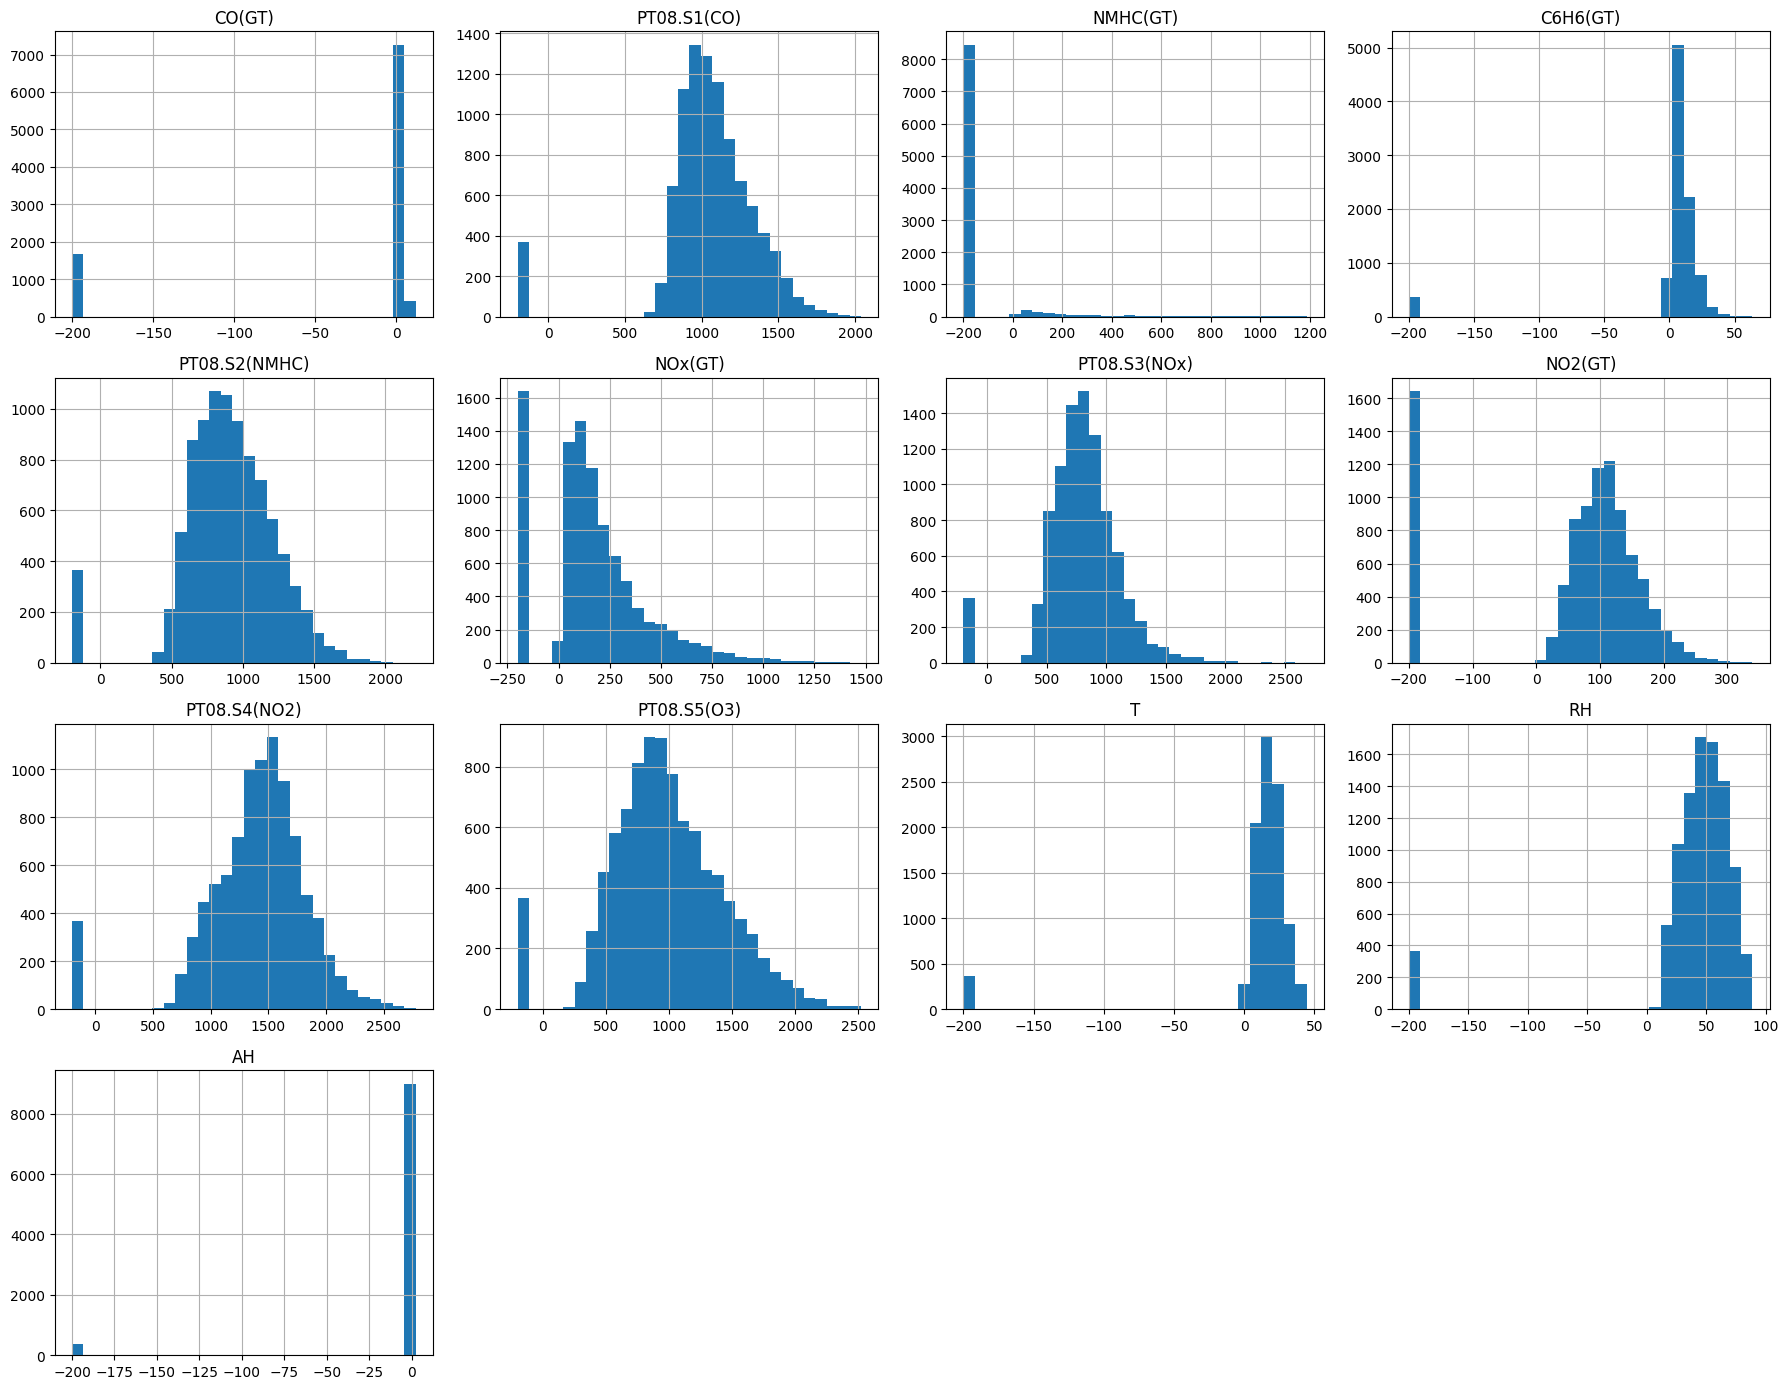

In [12]:
# Plot histograms for each column
print("\nPlotting histograms for each column...")
df.hist(bins=30, figsize=(18, 14))
plt.tight_layout()
plt.show()


Plotting correlation heatmap...


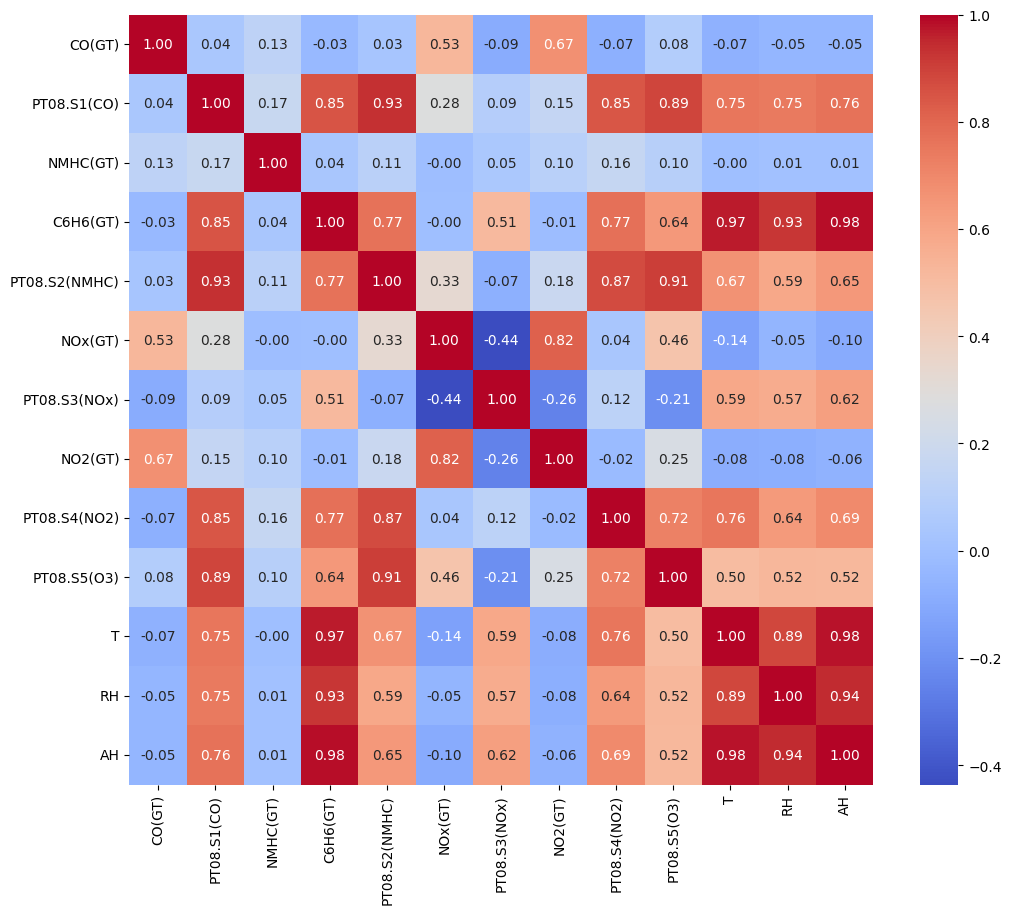

In [13]:
# Plot correlations
print("\nPlotting correlation heatmap...")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


Plotting pairplot for key variables...


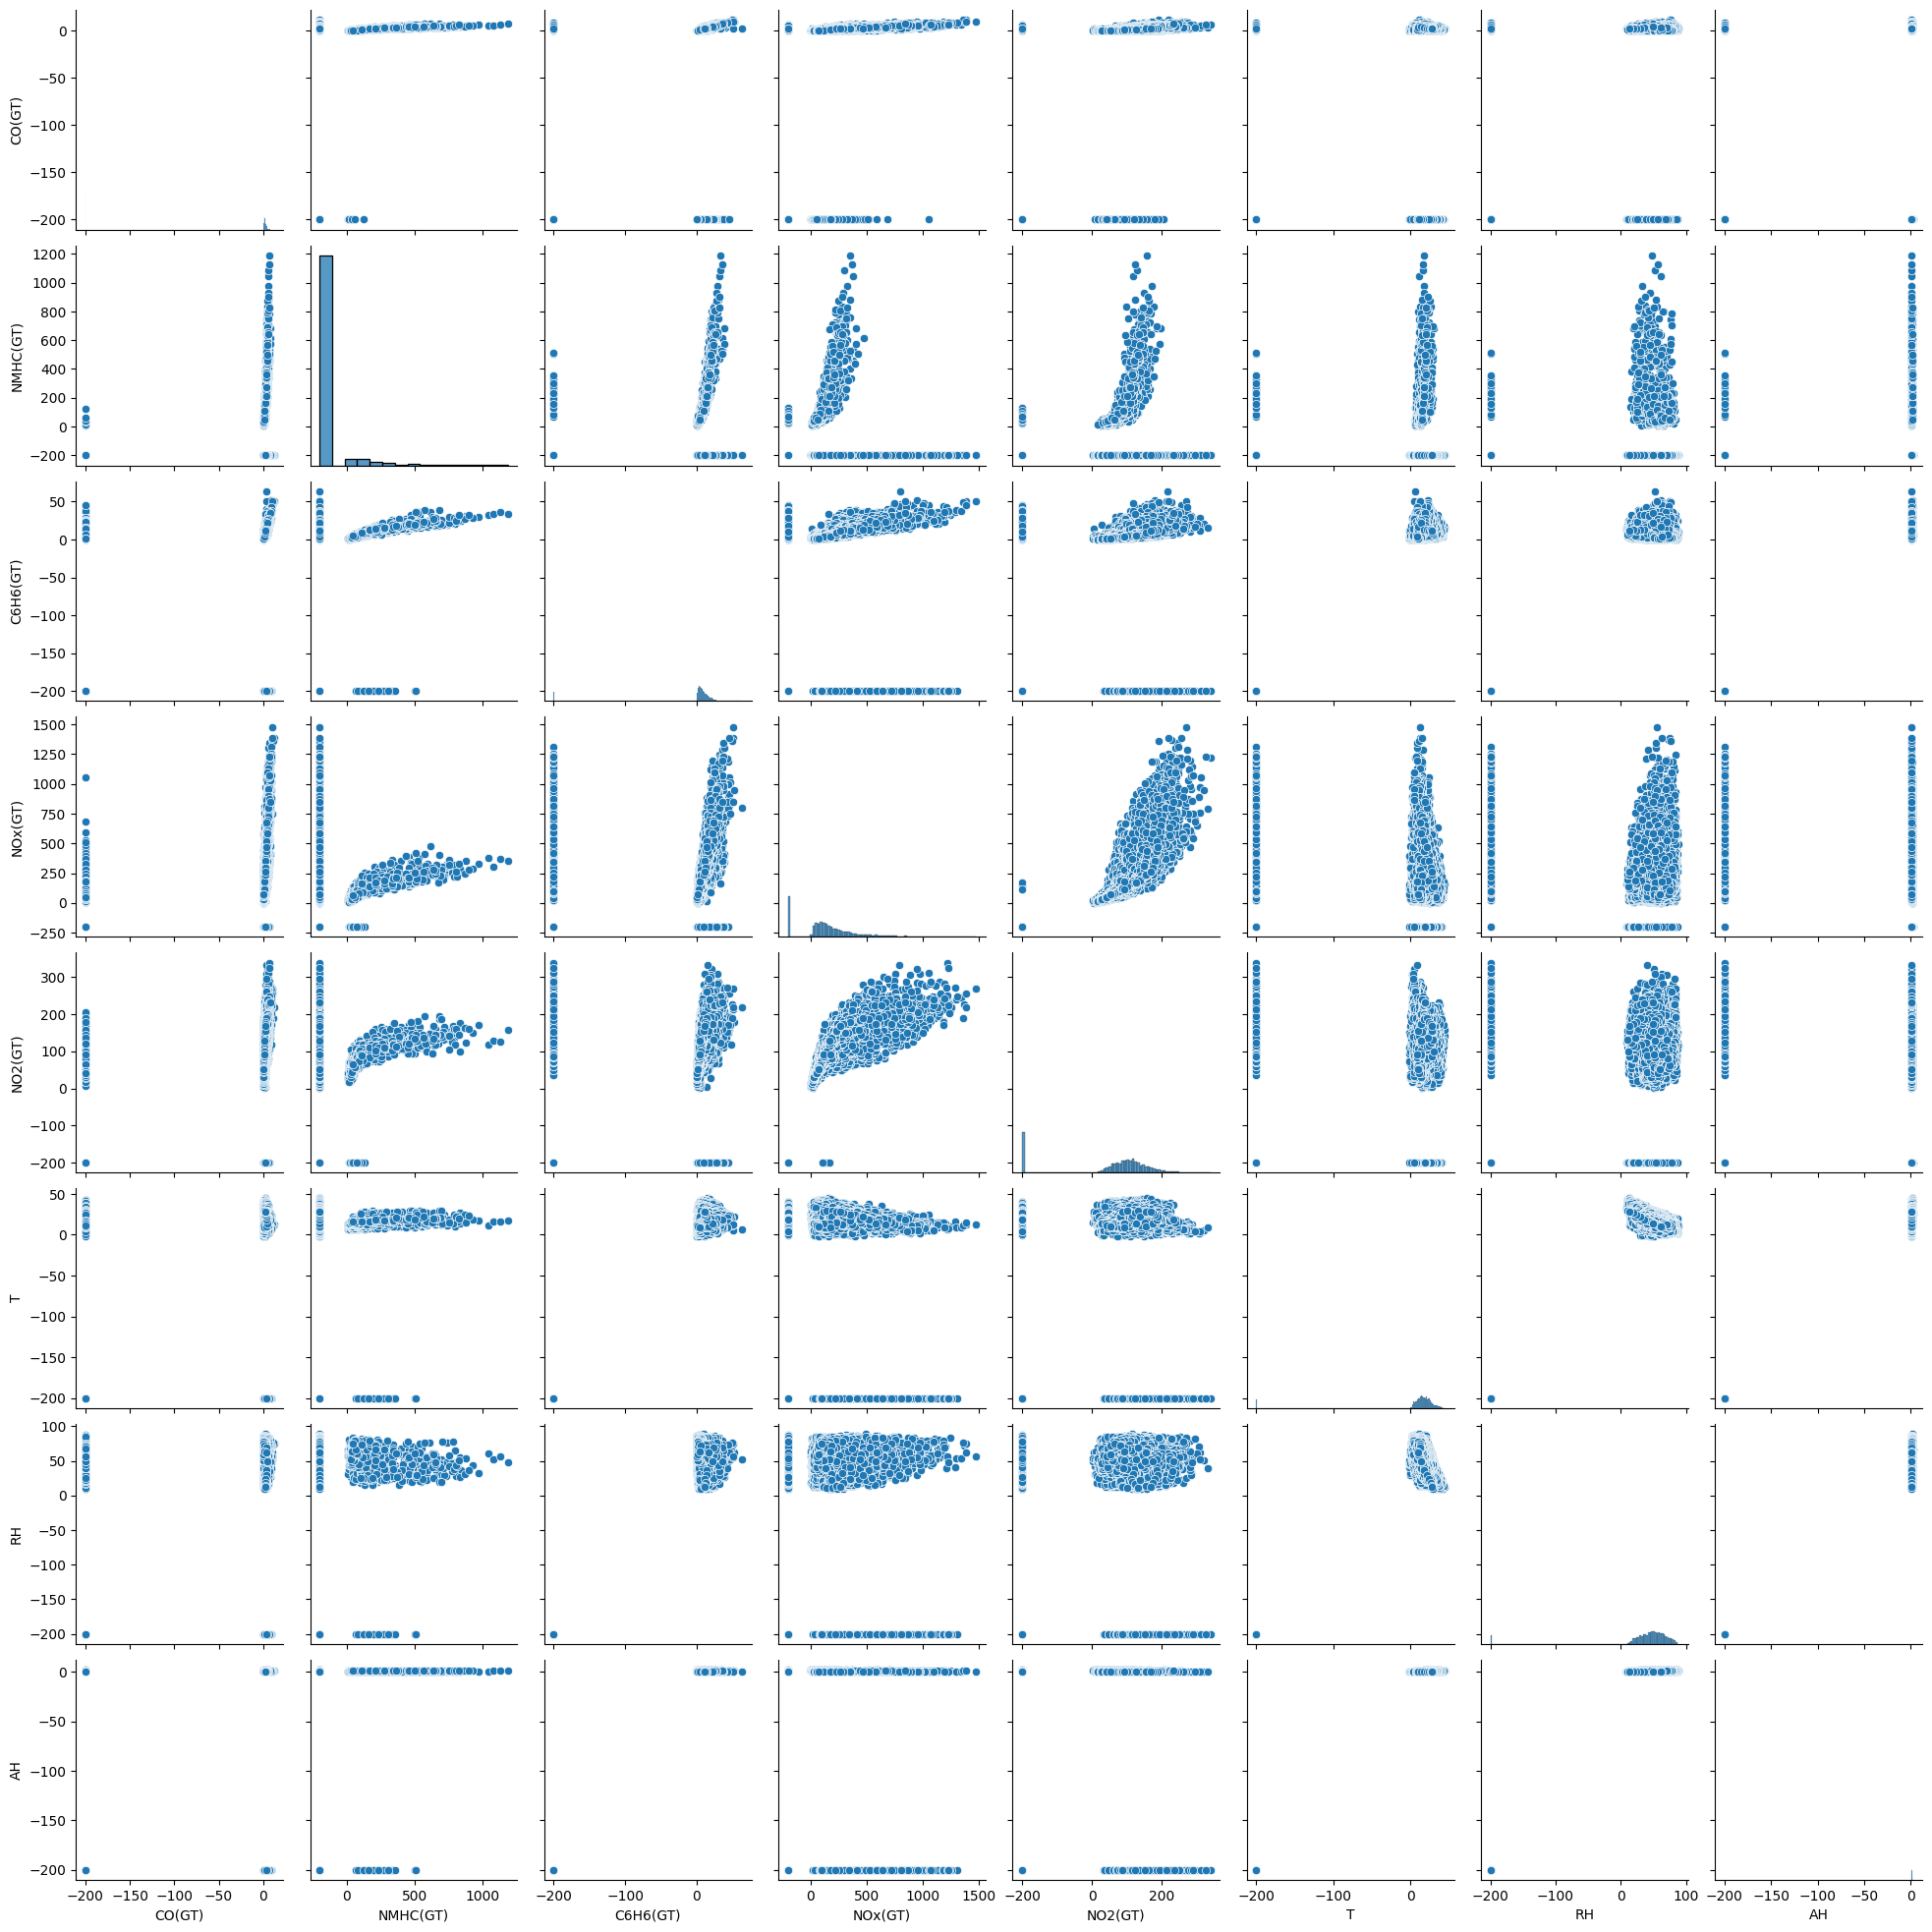

In [14]:
# Pairplot for a few key variables
print("\nPlotting pairplot for key variables...")
sns.pairplot(df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T', 'RH', 'AH']])
plt.show()


Plotting time series for key pollutants...


<Figure size 1400x700 with 0 Axes>

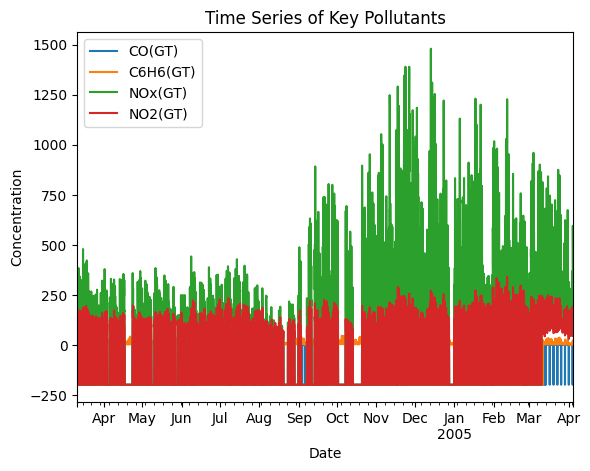

In [15]:
# Time series plot for some key pollutants
print("\nPlotting time series for key pollutants...")
plt.figure(figsize=(14, 7))
df[['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']].plot()
plt.title('Time Series of Key Pollutants')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()


Plotting scatter plot between Temperature and CO levels...


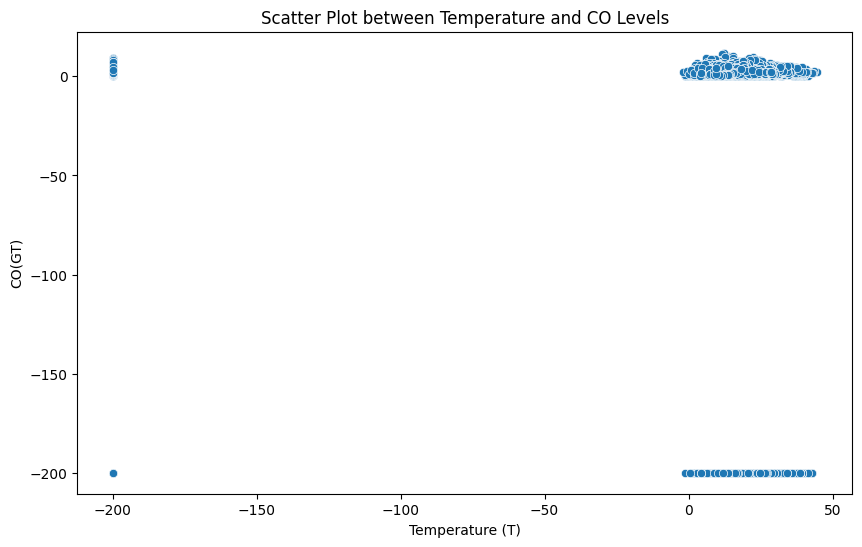

In [16]:
# Scatter plot between Temperature and CO levels
print("\nPlotting scatter plot between Temperature and CO levels...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T', y='CO(GT)', data=df)
plt.title('Scatter Plot between Temperature and CO Levels')
plt.xlabel('Temperature (T)')
plt.ylabel('CO(GT)')
plt.show()


Plotting line plot for monthly average CO(GT) levels...


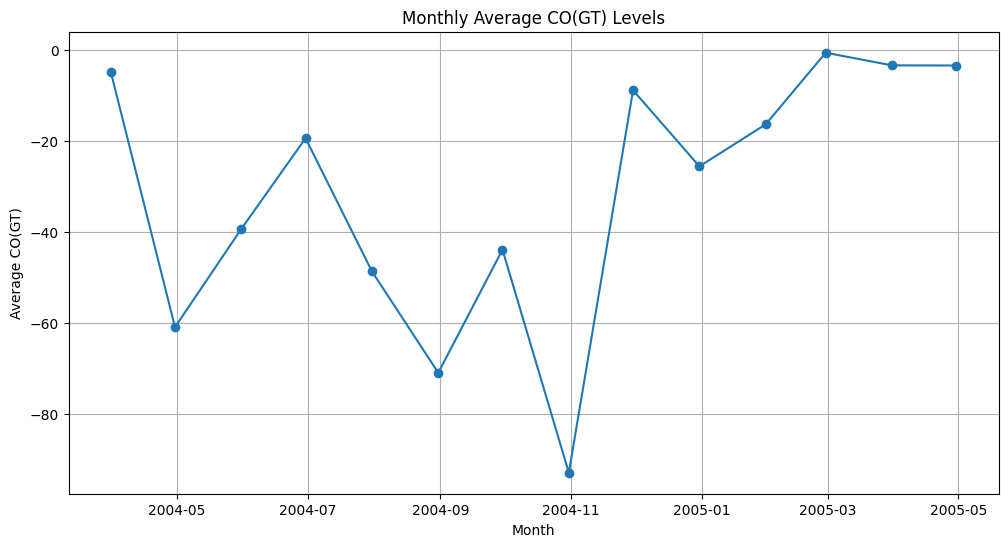

In [17]:
# # Box plot for CO(GT) levels by month
# df['Month'] = df.index.month
# print("\nPlotting box plot for CO(GT) levels by month...")
# plt.figure(figsize=(12, 6))
# sns.boxplot(x='Month', y='CO(GT)', data=df)
# plt.title('Monthly CO(GT) Levels')
# plt.xlabel('Month')
# plt.ylabel('CO(GT)')
# plt.show()

# Line Plot with Monthly Averages
print("\nPlotting line plot for monthly average CO(GT) levels...")
monthly_avg = df['CO(GT)'].resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Monthly Average CO(GT) Levels')
plt.xlabel('Month')
plt.ylabel('Average CO(GT)')
plt.grid(True)
plt.show()

# # Bar Plot with Monthly Averages
# print("\nPlotting bar plot for monthly average CO(GT) levels...")
# plt.figure(figsize=(12, 6))
# sns.barplot(x=monthly_avg.index.month, y=monthly_avg.values)
# plt.title('Monthly Average CO(GT) Levels')
# plt.xlabel('Month')
# plt.ylabel('Average CO(GT)')
# plt.show()

# # Violin Plot
# print("\nPlotting violin plot for CO(GT) levels by month...")
# plt.figure(figsize=(12, 6))
# sns.violinplot(x='Month', y='CO(GT)', data=df)
# plt.title('Monthly CO(GT) Levels')
# plt.xlabel('Month')
# plt.ylabel('CO(GT)')
# plt.show()